# Business Understanding
Microsoft wants to start creating video content. They want to know which films are doing best at the box office. Analysis of these datasets should provide insights into the next course of action


In [28]:
#import libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [29]:
#import IMDB dataset
conn = sqlite3.connect('im.db')
cur = conn.cursor()
cur.execute('''
SELECT name
  FROM sqlite_master
WHERE type = 'table'
''')
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [30]:
%%script sqlite3 data.sqlite --out tables
.tables
.quit

In [31]:
print(tables)

In [32]:
#viewing movie ratings table
movie_ratings_df = pd.read_sql('''
SELECT* 
 FROM movie_ratings ''', conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Movie_ratings Data Understanding

In [33]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [34]:
movie_ratings_df.shape

(73856, 3)

In [35]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [36]:
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

# Movie_ratings Data cleaning

In [37]:
movie_ratings_df = movie_ratings_df.rename(columns={"averagerating": "average_rating", "numvotes": "num_votes"})
movie_ratings_df



,movie_id,average_rating,num_votes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Movie Basics Data Understanding

In [38]:
movie_basics_df = pd.read_sql('''
SELECT* 
 FROM movie_basics ''', conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [39]:
movie_basics_df.shape

(146144, 6)

In [40]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [41]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [42]:
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [43]:
movie_basics_df.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

# Cleaning movie_basics

In [44]:
movie_basics_df.reset_index(drop=True)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Merging movie_basics and Movie_rating and Understanding the resulting data

In [45]:
best_rated_df = pd.read_sql( '''
SELECT genres, averagerating, start_year 
  FROM movie_basics
  JOIN movie_ratings
  USING(movie_id)''', conn)
best_rated_df


,genres,averagerating,start_year
0,"Action,Crime,Drama",7.0,2013
1,"Biography,Drama",7.2,2019
2,Drama,6.9,2018
3,"Comedy,Drama",6.1,2018
4,"Comedy,Drama,Fantasy",6.5,2017
...,...,...,...
73851,Documentary,6.2,2019
73852,"Drama,Family",8.7,2019
73853,Documentary,8.5,2017
73854,None,6.6,2019


In [46]:
best_rated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         73052 non-null  object 
 1   averagerating  73856 non-null  float64
 2   start_year     73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [47]:
best_rated_df.describe()

,averagerating,start_year
count,73856.000000,73856.000000
mean,6.332729,2014.276132
std,1.474978,2.614807
min,1.000000,2010.000000
25%,5.500000,2012.000000
50%,6.500000,2014.000000
75%,7.400000,2016.000000
max,10.000000,2019.000000


In [48]:
best_rated_df.isnull().sum()

genres           804
averagerating      0
start_year         0
dtype: int64

In [49]:

best_rated_df.shape

(73856, 3)

In [50]:
best_rated_df.nunique()

genres           923
averagerating     91
start_year        10
dtype: int64

# Data Cleaning best-rated-df

In [51]:
best_rated_df.dropna(subset=['genres'], axis=0, inplace=True)
best_rated_df


,genres,averagerating,start_year
0,"Action,Crime,Drama",7.0,2013
1,"Biography,Drama",7.2,2019
2,Drama,6.9,2018
3,"Comedy,Drama",6.1,2018
4,"Comedy,Drama,Fantasy",6.5,2017
...,...,...,...
73850,Documentary,6.2,2019
73851,Documentary,6.2,2019
73852,"Drama,Family",8.7,2019
73853,Documentary,8.5,2017


In [52]:
x = best_rated_df['genres'].value_counts().sort_values(ascending=False).head()
x



Drama           11612
Documentary     10313
Comedy           5613
Horror           2692
Comedy,Drama     2617
Name: genres, dtype: int64

# Visualizing the relationship between genres and average_rating 

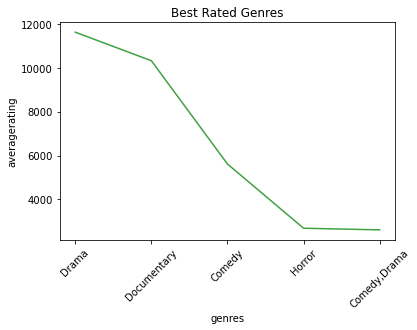

In [54]:
fig,ax = plt.subplots()
genres = x
ax.plot(genres, color='g', alpha=0.75)
ax.set_xlabel('genres')
ax.set_ylabel('averagerating')
ax.set_title('Best Rated Genres')

plt.xticks(rotation='45')
plt.show()
#plt.axvline( color='k', linewidth=1)

# Question 2: Which is the most profitable month to produce movies?
#Understanding, preparing and cleaning movie_budgets_df


In [55]:
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [56]:
movie_budgets_df.shape

(5782, 6)

In [57]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [58]:
movie_budgets_df.duplicated().sum()

0

In [59]:
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [60]:
movie_budgets_df[movie_budgets_df.columns[3:]] \
        = movie_budgets_df[movie_budgets_df.columns[3:]]\
        .apply(lambda x: x.str.replace('$',''))\
        .apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [61]:
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [62]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df['release_month'] = (movie_budgets_df['release_date']).dt.month

In [63]:
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,12
5778,79,1999-04-02,Following,6000,48482,240495,4
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,9


In [64]:
movie_budgets_df['profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
movie_budgets_df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,999721747
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,12,-7000
5778,79,1999-04-02,Following,6000,48482,240495,4,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,9,-1400


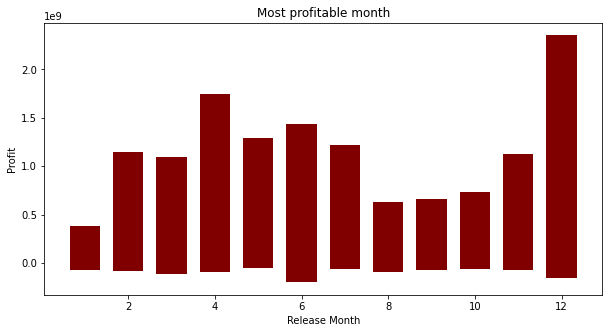

In [68]:
fig = plt.figure(figsize = (10, 5))
release_month = movie_budgets_df['release_month']
profit = movie_budgets_df['profit']
# creating the bar plot
plt.bar(release_month, profit, color ='maroon',
        width = 0.7)
 
plt.xlabel("Release Month")
plt.ylabel("Profit")
plt.title("Most profitable month")
plt.show()

# Understanding movie_earnings_df data

In [ ]:
#import movie.gross dataset
movie_earnings_df = pd.read_csv('bom.movie_gross.csv.gz') 
movie_earnings_df

In [ ]:
movie_earnings_df.shape

In [ ]:
movie_earnings_df.describe(include = 'all')

In [ ]:
movie_earnings_df.info()

In [ ]:
movie_earnings_df.isna().sum()

In [ ]:
movie_earnings_df['foreign_gross'].head(10)

In [ ]:
movie_earnings_df['foreign_gross'].tail(10)

Data understanding for the movie_basics 


In [ ]:
movie_information_df = pd.read_csv('rt.movie_info.tsv.gz', sep='\t', encoding='latin1')
movie_information_df

The code below isto help us understand movie_info df


In [ ]:
movie_information_df.shape

In [ ]:
movie_information_df.nunique()

In [ ]:
movie_information_df.info()

In [ ]:
movie_information_df.describe(include ='all')

In [ ]:
#average movie runtime
#movie_information_df.runtime.astype('object')
#movie_information_df['runtime'].mean()

In [ ]:
movie_information_df.duplicated()

In [ ]:
movie_information_df.isnull().sum()

In [ ]:
#drop empty row in ratings and reviews column
movie_information_df.dropna(subset=['studio', 'genre'], axis=0, how='any', inplace=True)
movie_information_df

In [ ]:
movie_information_df.drop_duplicates(subset=['studio', 'genre'], inplace=True)
movie_information_df

In [ ]:
movie_information_df.head(10)

# Visualization of movie_information_df


In [ ]:
#what genres are studios producing
#movie_information_df.plot(kind ='hist', color='red', bins=20);


In [ ]:
reviews_df= pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='latin1')
reviews_df

In [ ]:
reviews_df.shape

In [ ]:
reviews_df.nunique()

In [ ]:
reviews_df.info()

In [ ]:
movies_xstics_df = pd.read_csv('tmdb.movies.csv.gz')
movies_xstics_df


In [ ]:
movies_xstics_df.shape

In [ ]:
movies_xstics_df.describe()

In [ ]:
movies_xstics_df.info()

In [ ]:
pd.concat([movie_information_df, reviews_df], join="inner")

In [ ]:
x = movie_information_df.merge(reviews_df, left_on='rating', right_on='rating', suffixes=('_left', '_right'))

In [ ]:
x.isna().sum()

In [ ]:
x.shape

In [ ]:
x.describe()

In [ ]:
x.info()

In [ ]:
income_df = movie_budgets_df.join(movie_earnings_df, lsuffix='domestic_gross', rsuffix='domestic_gross')
income_df

In [ ]:
income_df.describe()

In [ ]:
income_df.isna().sum()

In [ ]:
income_df.nunique()


In [ ]:
income_df['studio'].value_counts()